In [68]:
import pandas as pd
import os,json
import seaborn as sns

def data_preprocessing():
    df = pd.DataFrame()
    pwd = os.getcwd()
    files = [x for x in os.listdir(pwd) if '.json' in x]

    for file in files:
        with open(pwd + '/' + file,'r',encoding='utf-8') as f:
            data = json.loads(f.read())
            df_new_row = pd.DataFrame(pd.json_normalize(data, record_path = ['messages']))
            df = pd.concat([df,df_new_row])

    df['unixtime'] = pd.to_datetime(df['timestamp_ms'], unit='ms')

    df['year'] = pd.DatetimeIndex(df['unixtime']).year
    df['month'] = pd.DatetimeIndex(df['unixtime']).month
    df['day'] = pd.DatetimeIndex(df['unixtime']).day
    df['hours'] = pd.DatetimeIndex(df['unixtime']).hour
    df['day_of_week'] = pd.DatetimeIndex(df['unixtime']).day_of_week

    df['month_year'] = df['month'].map(str)+ '-' +df['year'].map(str)
    df['month_year'] = pd.to_datetime(df['month_year'], format='%m-%Y').dt.strftime('%m-%Y')

    df['content_len'] = df['content'].apply(lambda x: len(str(x)))
    df['content_word'] = df['content'].apply(lambda x: len(str(x).split()))
    df =  df.sort_values(by = 'unixtime')
    return df

def all_time(df):
    
    print('First message was sent on', df['unixtime'].iloc[0], 'by', df['sender_name'].iloc[0])
    print('All stats:')
    messages = dict()
    words = dict()
    for person in unique_person:
        messages[person]=0
        words[person] =0
    
    for msg in range(len(df)):
        messages[df['sender_name'].iloc[msg]] +=1
        words[df['sender_name'].iloc[msg]] += df['content_word'].iloc[msg]
    
    for person in unique_person:
        print(person, 'msg:', messages[person], 'words:',words[person], 'avg:', f"{words[person]/messages[person]:.3}", 'wrds/msg')

def unique(df, unique, name_of_column):    
       
    for interval in unique:
        messages = dict()
        
        for person in unique_person:
            messages[person]=0
            
        
        for msg in range(len(df)):
            if df[name_of_column].iloc[msg] == interval:
                messages[df['sender_name'].iloc[msg]] +=1
            
        
        print(interval)
        for person in unique_person:           
            print(person, 'msg:', messages[person])      

def average_response_time(df):

    unique_person = df['sender_name'].unique()
    time = dict()
    counter = dict()
    for person in unique_person:
            time[person]=0
            counter[person] =0

    for msg in range(1,len(df)):
        if df['sender_name'].iloc[msg] != df['sender_name'].iloc[msg-1]:
            response_time = df['timestamp_ms'].iloc[msg] - df['timestamp_ms'].iloc[msg-1]
            time[df['sender_name'].iloc[msg]] += response_time
            counter[df['sender_name'].iloc[msg]] += 1
    
    print('Average response time in minutes:')
    for person in unique_person:
        print(person, f"{time[person]/(counter[person]*60000):.4}")


First message was sent on 2021-05-11 19:20:56.645000 by RafaÅ Stottko
All stats:
RafaÅ Stottko msg: 34942 words: 187970 avg: 5.38 wrds/msg
Ola Siarkowska msg: 22228 words: 78457 avg: 3.53 wrds/msg

Average response time in minutes:
RafaÅ Stottko 32.86
Ola Siarkowska 14.81


<AxesSubplot:xlabel='day_of_week', ylabel='count'>

c:\Users\stott\anaconda3\envs\myenv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


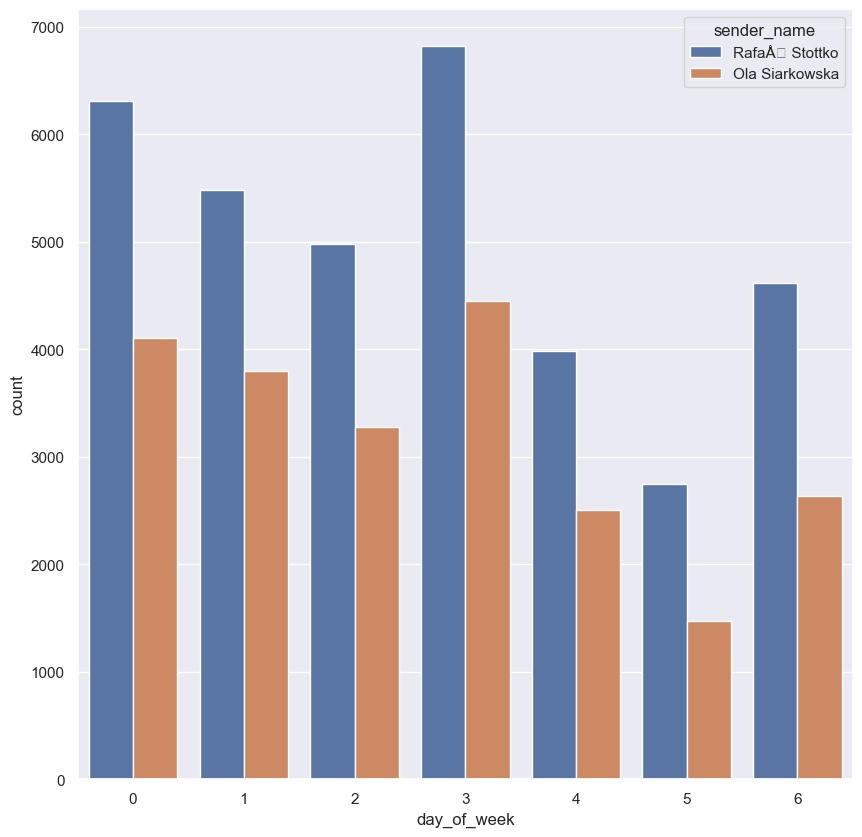

In [70]:
df = data_preprocessing()

unique_person = df['sender_name'].unique()
unique_month_year = df['month_year'].unique()
unique_year = df['year']. unique()
unique_month = df['month'].unique()
unique_day = df['day'].unique()
unique_hours = df['hours'].unique()
unique_day_of_week = df['day_of_week'].unique()     

all_time(df)
print('')
average_response_time(df)

#you can choose from hours, day_of_week, day, month, month_year or year
#additionally you can type 'hue = df['sender_name]' to specify sender on plot

sns.countplot(x = df['day_of_week'], hue = df['sender_name'])